In [25]:
# Step 1 of Data Science/ML: Import data

# import pandas and then read in the csv file.
import pandas as pd
data_frame = pd.read_csv('soccer_data.csv')
df = pd.DataFrame(data_frame)
# check the shape of the data_frame; 17660 rows, 29 columns. shape is a property
df.shape
print(df.columns.tolist())

['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause', 'Kit Number', 'Best Overall Rating']


In [11]:
# returns numerical summary statistics (as long as the information is numerical)
df.describe()

ID           Age       Overall     Potential       Special  \
count   17660.000000  17660.000000  17660.000000  17660.000000  17660.000000   
mean   246319.424462     23.127746     63.369592     70.981200   1537.915855   
std     31487.892861      4.639821      8.036268      6.529836    285.893809   
min        16.000000     15.000000     43.000000     42.000000    749.000000   
25%    240732.500000     20.000000     58.000000     67.000000   1387.000000   
50%    257041.000000     22.000000     63.000000     71.000000   1548.000000   
75%    263027.500000     26.000000     69.000000     75.000000   1727.000000   
max    271340.000000     54.000000     91.000000     95.000000   2312.000000   

       International Reputation     Weak Foot   Skill Moves    Kit Number  
count              17660.000000  17660.000000  17660.000000  17625.000000  
mean                   1.106285      2.900340      2.297169     25.037957  
std                    0.407021      0.663523      0.754264     19.154116  
min                    1.000000      1.000000      1.000000      1.000000  
25%                    1.000000      3.000000      2.000000     11.000000  
50%                    1.000000      3.000000      2.000000     22.000000  
75%                    1.000000      3.000000      3.000000     32.000000  
max                    5.000000      5.000000      5.000000     99.000000

In [12]:
# return values of the data...the data_frame is stored as an array as shown below.
df.values

array([[209658, 'L. Goretzka', 27, ..., '€157M', 8.0, nan],
       [212198, 'Bruno Fernandes', 27, ..., '€155M', 8.0, nan],
       [224334, 'M. Acuña', 30, ..., '€97.7M', 19.0, nan],
       ...,
       [270567, 'A. Demir', 25, ..., '€142K', 12.0, nan],
       [256624, '21\xa0S. Czajor', 18, ..., '€214K', 40.0, nan],
       [256376, '21\xa0F. Jakobsson', 20, ..., '€131K', 30.0, nan]],
      dtype=object)

In [13]:
# first 5 items
df.head()

ID             Name  Age  \
0  209658      L. Goretzka   27   
1  212198  Bruno Fernandes   27   
2  224334         M. Acuña   30   
3  192985     K. De Bruyne   31   
4  224232       N. Barella   25   

                                              Photo Nationality  \
0  https://cdn.sofifa.net/players/209/658/23_60.png     Germany   
1  https://cdn.sofifa.net/players/212/198/23_60.png    Portugal   
2  https://cdn.sofifa.net/players/224/334/23_60.png   Argentina   
3  https://cdn.sofifa.net/players/192/985/23_60.png     Belgium   
4  https://cdn.sofifa.net/players/224/232/23_60.png       Italy   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.net/flags/de.png       87         88  FC Bayern München   
1  https://cdn.sofifa.net/flags/pt.png       86         87  Manchester United   
2  https://cdn.sofifa.net/flags/ar.png       85         85         Sevilla FC   
3  https://cdn.sofifa.net/flags/be.png       91         91    Manchester City   
4  https://cdn.sofifa.net/flags/it.png       86         89              Inter   

                                 Club Logo  ... Real Face  \
0   https://cdn.sofifa.net/teams/21/30.png  ...       Yes   
1   https://cdn.sofifa.net/teams/11/30.png  ...       Yes   
2  https://cdn.sofifa.net/teams/481/30.png  ...        No   
3   https://cdn.sofifa.net/teams/10/30.png  ...       Yes   
4   https://cdn.sofifa.net/teams/44/30.png  ...       Yes   

                      Position        Joined Loaned From  \
0  <span class="pos pos28">SUB   Jul 1, 2018         NaN   
1  <span class="pos pos15">LCM  Jan 30, 2020         NaN   
2    <span class="pos pos7">LB  Sep 14, 2020         NaN   
3  <span class="pos pos13">RCM  Aug 30, 2015         NaN   
4  <span class="pos pos13">RCM   Sep 1, 2020         NaN   

   Contract Valid Until  Height  Weight Release Clause Kit Number  \
0                  2026   189cm    82kg          €157M        8.0   
1                  2026   179cm    69kg          €155M        8.0   
2                  2024   172cm    69kg         €97.7M       19.0   
3                  2025   181cm    70kg        €198.9M       17.0   
4                  2026   172cm    68kg        €154.4M       23.0   

  Best Overall Rating  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 29 columns]

<Axes: >

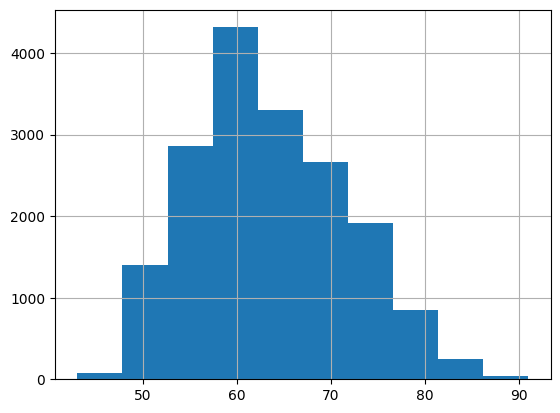

In [16]:
df['Overall'].hist()

In [24]:
# filter out those with an overall greater than 90, then print out their names (.tolist() removes the metadata)
over90 = df[df["Overall"] > 90].head()
print(over90["Name"].tolist())

['K. De Bruyne', 'R. Lewandowski', 'L. Messi', 'K. Mbappé', 'K. Benzema']


In [92]:
# Create a new DataFrame with the specified columns. Then, create a column to calculate the difference between 
# 'Value' and 'Wage'.


# Creates a new DataFrame with only the specified columns from the original DataFrame.
df1 = pd.DataFrame(df, columns=["Name", "Overall", "Potential", "Wage", "Value"])

# Function to convert values with the suffixes 'K', 'M', 'B' (thousand, million, billion) into floats without these suffixes.
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000  # Convert 'K' to 1000
        return 1000.0  # If there's only 'K', treat it as 1000
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000  # Convert 'M' to 1,000,000
        return 1000000.0  # If there's only 'M', treat it as 1,000,000
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000  # Convert 'B' to 1,000,000,000
    return 0.0  # Return 0.0 if no suffix found

# Use regex to remove the Euro symbol (€) and any commas, then apply the 'value_to_float' function to the 'Wage' and 'Value' 
# columns.
wage = df1['Wage'].replace('[\€,]', '', regex=True).apply(value_to_float)  # Clean and convert 'Wage'
value = df1['Value'].replace('[\€,]', '', regex=True).apply(value_to_float)  # Clean and convert 'Value'

# Update the 'Wage' and 'Value' columns with the cleaned and converted values.
df1['Wage'] = wage
df1['Value'] = value

# Create a new column 'Difference' to store the difference between 'Value' and 'Wage'.
df1['Difference'] = df1['Value'] - df1['Wage']

# Format the columns with commas for readability
# df1['Value'] = df1['Value'].apply(lambda x: '{:,.0f}'.format(x))
# df1['Wage'] = df1['Wage'].apply(lambda x: '{:,.0f}'.format(x))
# df1['Difference'] = df1['Difference'].apply(lambda x: '{:,.0f}'.format(x))

# Display or 'print' the new DataFrame with the calculated 'Difference' column.
df1.sort_values('Difference', ascending=False)


Name  Overall  Potential      Wage        Value   Difference
75         K. Mbappé       91         95  230000.0  190500000.0  190270000.0
180       E. Haaland       88         94  220000.0  148000000.0  147780000.0
17        F. de Jong       87         92  230000.0  116500000.0  116270000.0
214            Pedri       85         93  115000.0  116000000.0  115885000.0
25          M. Salah       90         90  270000.0  115500000.0  115230000.0
...              ...      ...        ...       ...          ...          ...
8455        14 Índio       72         72   20000.0          0.0     -20000.0
2031   14 J. Zanetti       75         75   45000.0       1000.0     -44000.0
199          R. Kent       83         83   45000.0          0.0     -45000.0
1287     14 R. Giggs       78         78   60000.0       1000.0     -59000.0
997   Z. Ibrahimović       82         82   63000.0          0.0     -63000.0

[17660 rows x 6 columns]

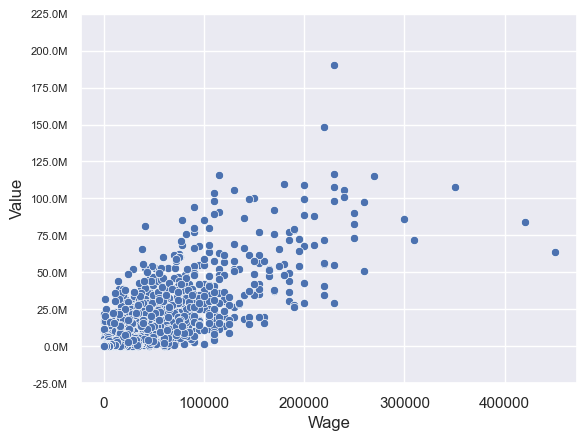

In [121]:
import seaborn as sns  # Import seaborn for data visualization
import matplotlib.pyplot as plt  # Import matplotlib for plotting and customization
import numpy as np  # Import numpy for numerical operations (although not directly used in the code)

sns.set()  # Apply default seaborn settings for better visualizations

# Create a scatter plot using seaborn. 'x' and 'y' are the column names in df1 for the data to plot.
graph = sns.scatterplot(x='Wage', y='Value', data=df1)  # Create a scatter plot with 'Wage' on the x-axis and 'Value' on the y-axis
graph  # This line ensures the plot is displayed in a Jupyter notebook or other IPython environments

# The following block is for customizing the y-axis ticks and their labels

# Retrieve the current y-ticks from the plot using matplotlib's gca() (get current axis)
yticks = plt.gca().get_yticks()  # gca() gets the current axis, then get_yticks() retrieves the y-axis ticks

# Create a new list of formatted tick labels by converting the values to millions (by dividing by 1,000,000)
# This is done by iterating through the tick values (yticks) and formatting them to display with 'M' for millions.
ytick_labels = [f"{tick/1000000:.1f}M" for tick in yticks]  # Format y-ticks to display values in millions, one decimal place

# Update the y-axis ticks and labels by specifying the ticks to use (yticks) and their formatted labels (ytick_labels)
# You can also adjust the font size of the labels by passing 'fontsize=8'
plt.yticks(ticks=yticks, labels=ytick_labels, fontsize=8)  # Apply the formatted labels and set the font size to 8

# Display the plot
plt.show()  # Show the plot with the custom y-tick labels


In [124]:
from bokeh.plotting import figure, show  # Import necessary functions for plotting
from bokeh.models import HoverTool, ColumnDataSource, NumeralTickFormatter  # Import HoverTool for interactivity, ColumnDataSource for data binding, and NumeralTickFormatter for formatting axis labels

# Set up the hover tool
hover = HoverTool()  # Initialize the HoverTool object
hover.tooltips = [
    ("index", "$index"),  # Display the index of the data point when hovered
    ("(Wage, Value)", "(@Wage, @Value)"),  # Show the 'Wage' and 'Value' values for each point
    ("Name", "@Name")  # Show the player's 'Name'
]

# ColumnDataSource is a Bokeh object that binds data to the plot. This step is optional:
# If you'd like more interactivity or data manipulation, you can convert the DataFrame (df1) to ColumnDataSource
# source = ColumnDataSource(df1)

# Create a new plot with a title, x-axis label ('Wage'), and y-axis label ('Value')
# Define the width and height of the plot in pixels. This is the canvas size for your visualization
p = figure(title="Soccer 2023", x_axis_label='Wage', y_axis_label='Value', width=2000, height=1500)

# Add the hover tool to the plot
p.add_tools(hover)  # Add the HoverTool to the figure so that tooltips appear when hovering over the points

# Create a scatter plot with 'Wage' on the x-axis and 'Value' on the y-axis
# 'color' sets the point color, 'size' sets the size of the points (adjustable for visibility)
# Instead of converting to ColumnDataSource, we can directly use df1 as the source for simplicity
p.scatter('Wage', 'Value', color='blue', size=5, source=df1)  # Create scatter points with blue color and size 5

# Set the y-axis tick values. We specify a range from 0 to 200 million, with ticks at intervals of 1.5 million
# Adjust this according to your data range and desired granularity of tick marks
p.yaxis.ticker = np.arange(0, 200000000, 1500000)  # Create y-axis ticks every 1.5 million, between 0 and 200 million

# Format the x-axis and y-axis labels to display numbers with abbreviations like K (thousands), M (millions), etc.
# This uses a format specifier "0.0a" which abbreviates large numbers (e.g., 1,000,000 becomes 1M, 1,000 becomes 1K)
p.xaxis.formatter = NumeralTickFormatter(format="0.0a")  # Apply number formatting to x-axis
p.yaxis.formatter = NumeralTickFormatter(format="0.0a")  # Apply number formatting to y-axis

# Display the plot
show(p)  # Render the plot in your browser or Jupyter notebook (depending on your environment)
